In [1]:
import pandas as pd
import numpy as np

In [82]:
data=pd.read_csv('D:\\MachineCourse\\MachineLearnig\\NLP\\NLP-main\\testCode\\nlp\\smsspamcollection.tsv', sep='\t')

In [83]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [84]:
data.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [85]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
length,5572.0,80.489950,59.942907,2.0,36.0,62.0,122.0,910.0
punct,5572.0,4.177495,4.623919,0.0,2.0,3.0,6.0,133.0


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [87]:
#Preprocessing Data
def convert_to_lower(text):
    return text.lower()

data["message"] = data["message"].apply(lambda x: convert_to_lower(x))


In [88]:
import re
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

data["message"] = data["message"].apply(lambda x: remove_numbers(x))

In [89]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

data["message"] = data["message"].apply(lambda x: remove_punctuation(x))


In [90]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

nltk.download("stopwords")

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

data["message"] = data["message"].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
data.head(20)

,label,message,length,punct
0,ham,go jurong point crazy available bugis n great ...,111,9
1,ham,ok lar joking wif u oni,29,6
2,spam,free entry wkly comp win fa cup final tkts st ...,155,6
3,ham,u dun say early hor u c already say,49,6
4,ham,nah dont think goes usf lives around though,61,2
5,spam,freemsg hey darling weeks word back id like fu...,147,8
6,ham,even brother like speak treat like aids patent,77,2
7,ham,per request melle melle oru minnaminunginte nu...,160,6
8,spam,winner valued network customer selected receiv...,157,6
9,spam,mobile months u r entitled update latest colou...,154,2


In [92]:
data['label'].unique()

array(['ham', 'spam'], dtype=object)

D:\Anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

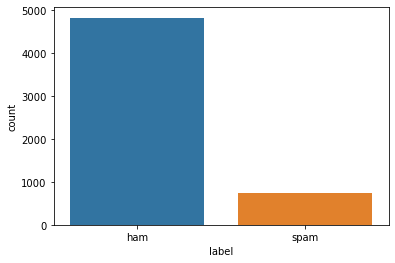

In [93]:
import seaborn as sns
sns.countplot(data['label'])

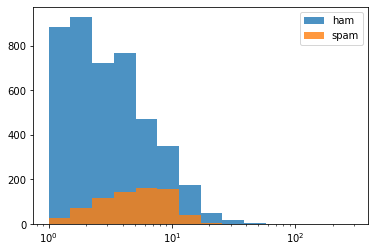

In [94]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(data[data['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(data[data['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [95]:
data['label']=data['label'].map({'spam':0,'ham':1})

In [96]:
feature_drop=['message','label']
X=data.drop(feature_drop,axis=1)
y=data['label']

In [97]:
X

,length,punct
0,111,9
1,29,6
2,155,6
3,49,6
4,61,2
...,...,...
5567,160,8
5568,36,1
5569,57,7
5570,125,1


In [98]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: label, Length: 5572, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [100]:
X_train

,length,punct
3534,22,2
1998,149,4
3856,151,5
5544,154,8
9,154,2
...,...,...
4258,152,9
1085,910,22
1823,45,2
4840,74,2


In [101]:
X_test

,length,punct
3667,169,9
2489,70,2
1793,132,10
1312,83,3
5274,101,6
...,...,...
1146,115,3
5271,45,1
1430,71,3
147,159,7


In [102]:
y_train

3534    1
1998    1
3856    0
5544    1
9       0
       ..
4258    0
1085    1
1823    1
4840    1
5072    1
Name: label, Length: 4457, dtype: int64

In [103]:
y_test

3667    1
2489    1
1793    0
1312    1
5274    1
       ..
1146    0
5271    1
1430    0
147     0
865     1
Name: label, Length: 1115, dtype: int64

In [104]:
from sklearn.svm import SVC
model=SVC()

In [105]:
#Training model
model.fit(X_train,y_train)

SVC()

In [108]:
from sklearn import metrics
prediction= model.predict(X_test)
print(metrics.confusion_matrix(y_test,prediction))
print(metrics.classification_report(y_test,prediction))
print(metrics.accuracy_score(y_test,prediction))

[[ 49 106]
 [ 33 927]]
              precision    recall  f1-score   support

           0       0.60      0.32      0.41       155
           1       0.90      0.97      0.93       960

    accuracy                           0.88      1115
   macro avg       0.75      0.64      0.67      1115
weighted avg       0.86      0.88      0.86      1115

0.8753363228699551
